In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.8.0
Hub version: 0.12.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [ ]:
!unzip "/content/drive/MyDrive/Sign Language Project/BdSL_Word_Eng.zip"

Archive:  /content/drive/MyDrive/Sign Language Project/BdSL_Word_Eng.zip
   creating: Word/
   creating: Word/Color/
  inflating: Word/Color/IMG-20220122-WA0035.jpg  
  inflating: Word/Color/IMG-20220122-WA0036.jpg  
  inflating: Word/Color/IMG-20220122-WA0037.jpg  
  inflating: Word/Color/IMG-20220122-WA0039.jpg  
  inflating: Word/Color/IMG-20220122-WA0040.jpg  
  inflating: Word/Color/IMG-20220122-WA0042.jpg  
  inflating: Word/Color/IMG_20220121_173754.jpg  
  inflating: Word/Color/IMG_20220121_173755.jpg  
  inflating: Word/Color/IMG_20220121_173757.jpg  
  inflating: Word/Color/IMG_20220121_173758.jpg  
  inflating: Word/Color/IMG_20220121_173800.jpg  
  inflating: Word/Color/IMG_20220121_173802.jpg  
  inflating: Word/Color/IMG_20220121_173803.jpg  
  inflating: Word/Color/IMG_20220121_173805.jpg  
  inflating: Word/Color/IMG_20220121_173807.jpg  
  inflating: Word/Color/IMG_20220121_173808.jpg  
  inflating: Word/Color/IMG_20220121_173809.jpg  
  inflating: Word/Color/IMG_20220

In [ ]:
import numpy as np 
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.applications import resnet
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.layers import Conv2D

from keras.layers import MaxPooling2D

In [ ]:
# input path for the images
base_path = '/content/Word'

In [ ]:
SIZE=64
image_size = (SIZE, SIZE)
batch_size = 32
channels = 3
kernel = 4
stride = 1
pool = 2

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

Found 992 files belonging to 10 classes.
Using 794 files for training.
Found 992 files belonging to 10 classes.
Using 198 files for validation.


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)

# Modified CNN

In [ ]:
model=Sequential()

model.add(Conv2D(16,kernel_size=kernel,strides=stride,padding='same',activation='relu',input_shape=(SIZE, SIZE, channels)))

model.add(MaxPool2D(pool_size=pool,strides=2,padding='same'))

model.add(Conv2D(32,kernel_size=kernel,strides=stride,activation='relu',padding='same'))

model.add(MaxPool2D((pool),2,padding='same'))

model.add(Conv2D(64,kernel_size=kernel,strides=stride,activation='relu',padding='same'))

model.add(MaxPool2D((pool),2,padding='same'))
          
model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=num_classes,activation='softmax'))

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        32832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='checkpoint.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model.fit( train_ds, epochs=10, callbacks=model_checkpoint, validation_data=val_ds, )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 47s 1s/step - loss: 19.3667 - accuracy: 0.1499 - val_loss: 2.1448 - val_accuracy: 0.2727
Epoch 2/10
25/25 [==============================] - 36s 1s/step - loss: 1.6025 - accuracy: 0.4572 - val_loss: 1.5071 - val_accuracy: 0.5101
Epoch 3/10
25/25 [==============================] - 36s 1s/step - loss: 0.9501 - accuracy: 0.6814 - val_loss: 1.0001 - val_accuracy: 0.6818
Epoch 4/10
25/25 [==============================] - 36s 1s/step - loss: 0.5133 - accuracy: 0.8413 - val_loss: 0.8453 - val_accuracy: 0.7020
Epoch 5/10
25/25 [==============================] - 36s 1s/step - loss: 0.2863 - accuracy: 0.9055 - val_loss: 0.8285 - val_accuracy: 0.7475
Epoch 6/10
25/25 [==============================] - 36s 1s/step - loss: 0.1976 - accuracy: 0.9395 - val_loss: 0.9896 - val_accuracy: 0.7222
Epoch 7/10
25/25 [==============================] - 36s 1s/step - loss: 0.1989 - accuracy: 0.9358 - val_loss: 0.9134 - val_accuracy: 0.7626
Epoch 8/10
25/25 [============

In [ ]:
#save the model for predictions
model.save('/content/drive/MyDrive/Sign Language Project/bdsl_word_eng_CNN.h5')

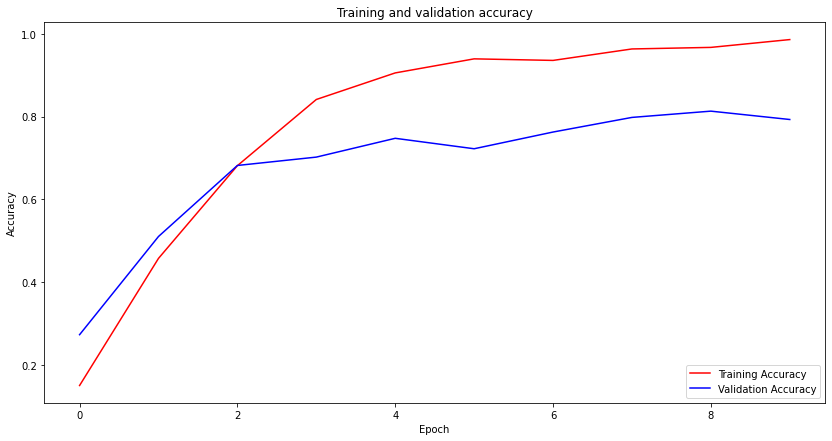

In [ ]:
# Validation and Training accuracy plot
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

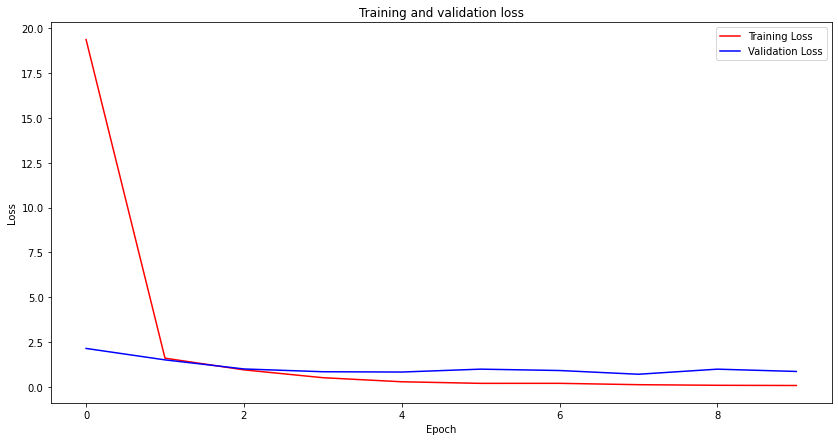

In [ ]:
#Validation and Training loss plot
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
#Show predicition for one image

import tensorflow as tf
import cv2
import numpy as np
from skimage import transform


CATEGORIES = ['Color', 'Friend', 'Myself', 'Promise', 'Request', 'Salam','Surprise', 'They', 'Think', 'You']




def convert(np_image):
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (64, 64, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image




model = tf.keras.models.load_model("/content/drive/MyDrive/Sign Language Project/bdsl_word_eng_CNN.h5")

In [ ]:
img = cv2.imread("/content/Word/Friend/IMG_20220121_173016.jpg")
img.shape

(3413, 2506, 3)

In [ ]:
image = convert(img)
image.shape

(1, 64, 64, 3)

In [ ]:
prediction = model.predict(image)

In [ ]:
print(CATEGORIES[int(np.argmax(prediction[0]))])

Friend


In [ ]:
img2 = cv2.imread("/content/Word/Surprise/IMG_20220121_172802.jpg")
img2.shape

(3556, 3000, 3)

In [ ]:
image = convert(img2)
image.shape

(1, 64, 64, 3)

In [ ]:
prediction = model.predict(image)

In [ ]:
print(CATEGORIES[int(np.argmax(prediction[0]))])

Surprise


# ResNet50

In [ ]:
classifier_resnet = resnet.ResNet50(input_shape= (64,64,3),include_top=False,weights='imagenet')
for layer in classifier_resnet.layers:
    layer.trainable = False

94781440/94765736 [==============================] - 2s 0us/step


In [ ]:
classifier2 = classifier_resnet.output#head mode
classifier2 = Flatten()(classifier2)#adding layer of flatten
classifier2 = Dropout(0.6)(classifier2)
classifier2 = Dense(units=num_classes, activation='softmax')(classifier2)

model2 = Model(inputs = classifier_resnet.input , outputs = classifier2)
model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
history2 = model2.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 44s 1s/step - loss: 4.1502 - accuracy: 0.3678 - val_loss: 0.8051 - val_accuracy: 0.7525
Epoch 2/10
25/25 [==============================] - 37s 1s/step - loss: 1.3799 - accuracy: 0.7317 - val_loss: 0.6556 - val_accuracy: 0.8384
Epoch 3/10
25/25 [==============================] - 36s 1s/step - loss: 0.8410 - accuracy: 0.7972 - val_loss: 0.5254 - val_accuracy: 0.8838
Epoch 4/10
25/25 [==============================] - 38s 1s/step - loss: 0.5396 - accuracy: 0.8690 - val_loss: 0.5375 - val_accuracy: 0.8737
Epoch 5/10
25/25 [==============================] - 36s 1s/step - loss: 0.3467 - accuracy: 0.9068 - val_loss: 0.4622 - val_accuracy: 0.9040
Epoch 6/10
25/25 [==============================] - 37s 1s/step - loss: 0.3739 - accuracy: 0.9106 - val_loss: 0.4743 - val_accuracy: 0.8939
Epoch 7/10
25/25 [==============================] - 37s 1s/step - loss: 0.4070 - accuracy: 0.9030 - val_loss: 0.5051 - val_accuracy: 0.8939
Epoch 8/10
25/25 [=============

In [ ]:
#save the model for predictions
model2.save('/content/drive/MyDrive/Sign Language Project/bdsl_word_eng_resnet.h5')

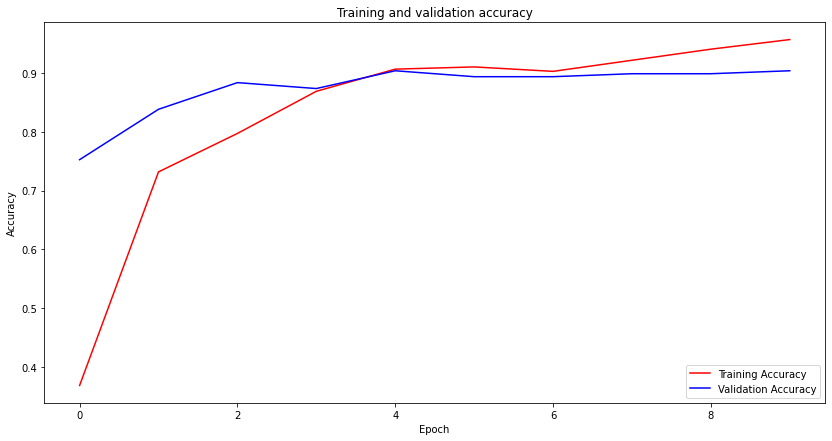

In [ ]:
# Validation and Training accuracy plot
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

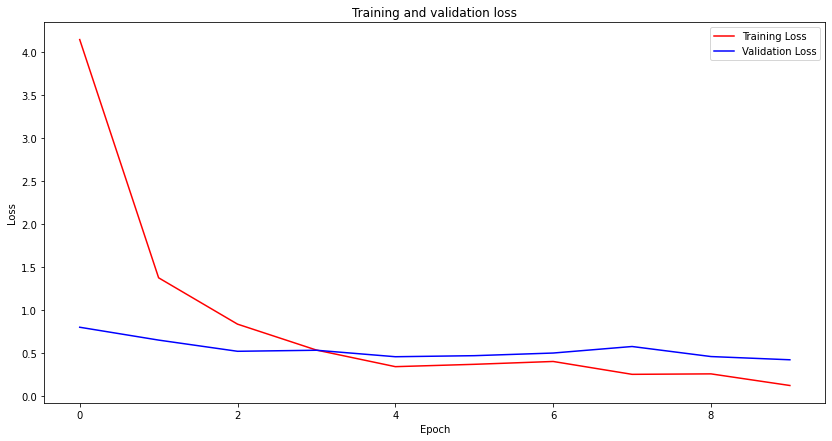

In [ ]:
#Validation and Training loss plot
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
#Show predicition for one image

import tensorflow as tf
import cv2
import numpy as np
from skimage import transform


CATEGORIES = ['Color', 'Friend', 'Myself', 'Promise', 'Request', 'Salam','Surprise', 'They', 'Think', 'You']




def convert(np_image):
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (64, 64, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image




model2 = tf.keras.models.load_model("/content/drive/MyDrive/Sign Language Project/bdsl_word_eng_resnet.h5")

In [ ]:
img = cv2.imread("/content/Word/Color/IMG-20220122-WA0039.jpg")
img.shape

(1600, 1200, 3)

In [ ]:
image = convert(img)
image.shape

(1, 64, 64, 3)

In [ ]:
prediction = model2.predict(image)

In [ ]:
print(CATEGORIES[int(np.argmax(prediction[0]))])

Color


In [ ]:
img = cv2.imread("/content/Word/Request/IMG_20220121_171553.jpg")
img.shape

(3511, 2987, 3)

In [ ]:
image = convert(img)
image.shape

(1, 64, 64, 3)

In [ ]:
prediction = model2.predict(image)

In [ ]:
print(CATEGORIES[int(np.argmax(prediction[0]))])

Request


# VGG19

In [ ]:
classifier_vgg19 = tf.keras.applications.VGG19(input_shape= (64,64,3),include_top=False,weights='imagenet')
for layer in classifier_vgg19.layers:
    layer.trainable = False

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
classifier3 = classifier_vgg19.output#head mode
classifier3 = Flatten()(classifier3)#adding layer of flatten
classifier3 = Dense(units=256, activation='relu')(classifier3)
classifier3 = Dropout(0.6)(classifier3)
classifier3 = Dense(units=num_classes, activation='softmax')(classifier3)

model3 = Model(inputs = classifier_vgg19.input , outputs = classifier3)
model3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [ ]:
history3 = model3.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 40s 1s/step - loss: 17.4124 - accuracy: 0.3665 - val_loss: 1.9535 - val_accuracy: 0.7929
Epoch 2/10
25/25 [==============================] - 38s 1s/step - loss: 3.0971 - accuracy: 0.7065 - val_loss: 0.8670 - val_accuracy: 0.8939
Epoch 3/10
25/25 [==============================] - 37s 1s/step - loss: 1.6224 - accuracy: 0.7443 - val_loss: 0.5777 - val_accuracy: 0.8990
Epoch 4/10
25/25 [==============================] - 37s 1s/step - loss: 1.0377 - accuracy: 0.8023 - val_loss: 0.7197 - val_accuracy: 0.8788
Epoch 5/10
25/25 [==============================] - 37s 1s/step - loss: 0.6906 - accuracy: 0.8539 - val_loss: 0.4746 - val_accuracy: 0.9040
Epoch 6/10
25/25 [==============================] - 37s 1s/step - loss: 0.6536 - accuracy: 0.8602 - val_loss: 0.3777 - val_accuracy: 0.9192
Epoch 7/10
25/25 [==============================] - 37s 1s/step - loss: 0.5999 - accuracy: 0.8615 - val_loss: 0.4062 - val_accuracy: 0.9495
Epoch 8/10
25/25 [============

In [ ]:
#save the model for predictions
model2.save('/content/drive/MyDrive/Sign Language Project/bdsl_word_eng_vgg19.h5')

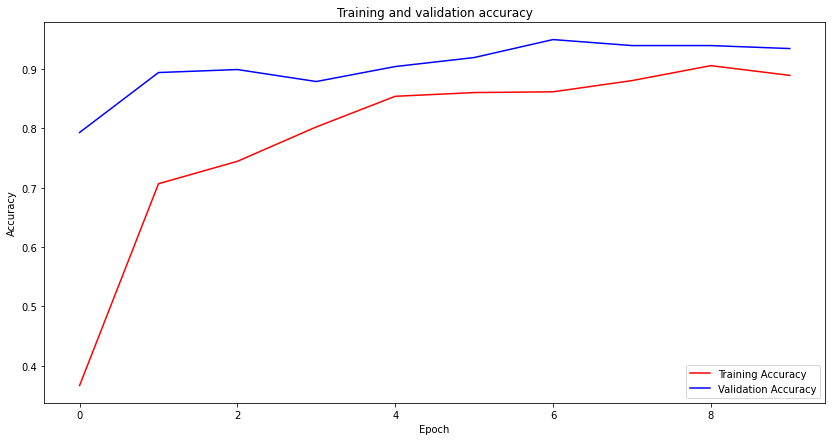

In [ ]:
# Validation and Training accuracy plot
acc=history3.history['accuracy']
val_acc=history3.history['val_accuracy']
loss=history3.history['loss']
val_loss=history3.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

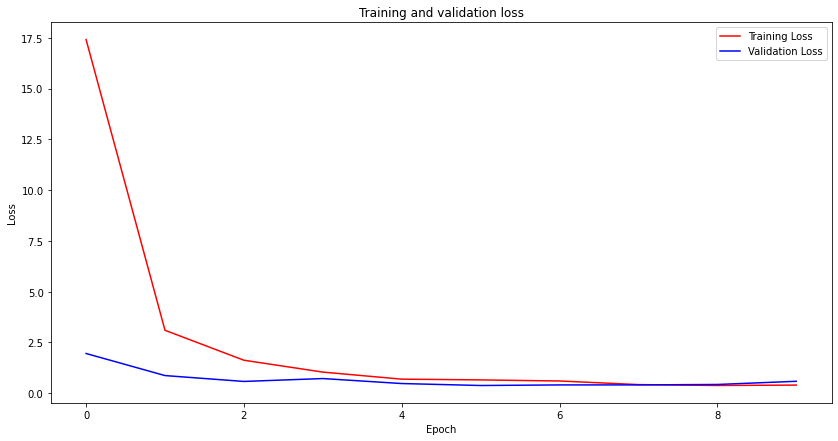

In [ ]:
#Validation and Training loss plot
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

# VGG16

In [ ]:
classifier_vgg16 = VGG16(input_shape= (64,64,3),include_top=False,weights='imagenet')
for layer in classifier_vgg16.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
classifier4 = classifier_vgg16.output#head mode
classifier4 = Flatten()(classifier4)#adding layer of flatten
classifier4 = Dense(units=256, activation='relu')(classifier4)
classifier4 = Dropout(0.6)(classifier4)
classifier4 = Dense(units=num_classes, activation='softmax')(classifier4)

model4 = Model(inputs = classifier_vgg16.input , outputs = classifier4)
model4.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [ ]:
history4 = model4.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 40s 1s/step - loss: 20.7233 - accuracy: 0.3804 - val_loss: 1.6174 - val_accuracy: 0.8283
Epoch 2/10
25/25 [==============================] - 36s 1s/step - loss: 3.5907 - accuracy: 0.7028 - val_loss: 1.3058 - val_accuracy: 0.8333
Epoch 3/10
25/25 [==============================] - 36s 1s/step - loss: 1.6220 - accuracy: 0.7922 - val_loss: 0.8556 - val_accuracy: 0.8535
Epoch 4/10
25/25 [==============================] - 37s 1s/step - loss: 0.9919 - accuracy: 0.8438 - val_loss: 0.6792 - val_accuracy: 0.8636
Epoch 5/10
25/25 [==============================] - 37s 1s/step - loss: 0.7391 - accuracy: 0.8627 - val_loss: 0.6074 - val_accuracy: 0.8889
Epoch 6/10
25/25 [==============================] - 36s 1s/step - loss: 0.5676 - accuracy: 0.8816 - val_loss: 0.8157 - val_accuracy: 0.8687
Epoch 7/10
25/25 [==============================] - 36s 1s/step - loss: 0.5875 - accuracy: 0.8854 - val_loss: 0.6116 - val_accuracy: 0.8889
Epoch 8/10
25/25 [============

In [ ]:
#save the model for predictions
model2.save('/content/drive/MyDrive/Sign Language Project/bdsl_word_eng_vgg16.h5')

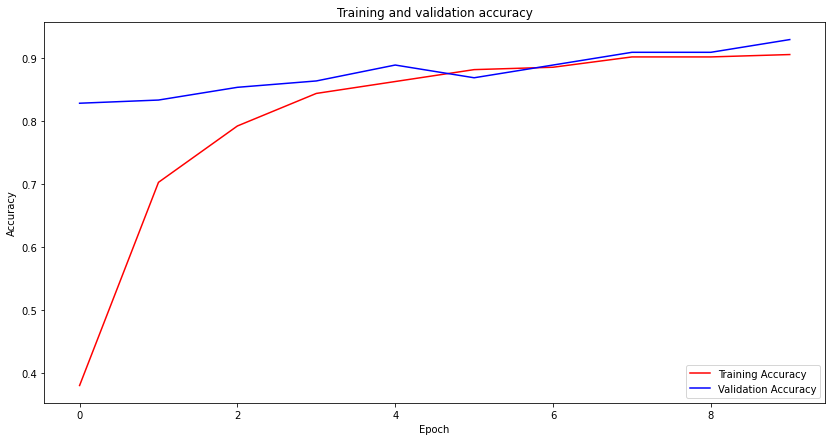

In [ ]:
# Validation and Training accuracy plot
acc=history4.history['accuracy']
val_acc=history4.history['val_accuracy']
loss=history4.history['loss']
val_loss=history4.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

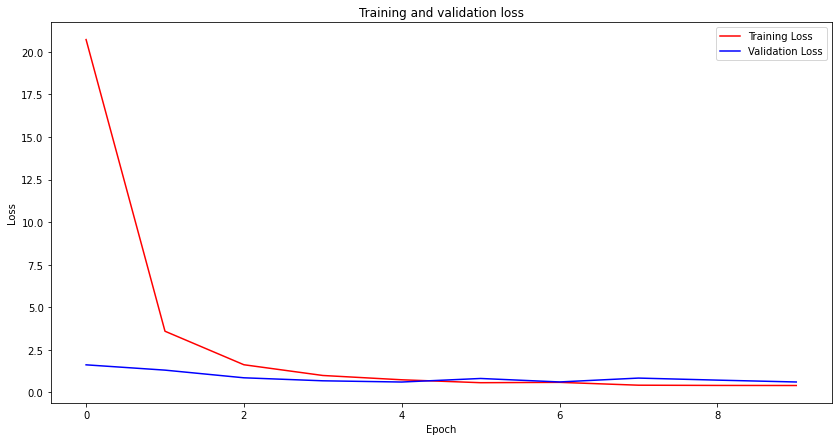

In [ ]:
#Validation and Training loss plot
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')